# Info and Sources

## Contributors
- Nicola Tosi
- Sebastiano Padovan

## Objective

- Illustrate degenaracy of simple two-layer models of interior structure of Mars and Mercury based on the observed 

## Background

- The basic interior structure of planetary bodies can be constrained to the first order by using the observed mean density (obtained from measurements of mass and radius) and polar moment of inertia (obtained from measurements of the rotational state). However even the simplest two-layer model of an interior composed by mantle and core has an intrinsic degeneracy due to the fact that two constraints are available (mean density and moment of inertia) but three quantities need to be determined, namely the density of the mantle, density of the core, and size of the core. The notebook illustrates this problem for the interior structures of Mars and Mercury.

## Planetary Geology Book

- The notebook is related to Chapter 10 of [Planetary Geology](http://www.springer.com/de/book/9783319651774) (see Figure 10.2)

# Two-layer interior structure models

## Mars Interior Structure

In [1]:
# Import standard libraries
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Import additional specific modules
import interior_structure as ints
from planets_class import plc
import GV

In [2]:
# Select planet
planet = plc("Mars", debug=0)
mars = planet
# Set mean density and moment of inertia factor
rho0 = mars.density
moif = mars.moif

In [3]:
# Run two-layer interior structure model 
# (see two_layers)
Rc, Mc, rhoc, rhom = ints.two_layer_model(rho0, moif)
rho = np.ones_like(Rc)*rho0

interior_structure.py:22: RuntimeWarning: invalid value encountered in divide
  rhoc = rho*(5./2*moif-(1-Rc_ratio**5)/(1-Rc_ratio**3)) / (Rc_ratio**5-Rc_ratio**3*(1-Rc_ratio**5)/(1-Rc_ratio**3))
interior_structure.py:22: RuntimeWarning: divide by zero encountered in divide
  rhoc = rho*(5./2*moif-(1-Rc_ratio**5)/(1-Rc_ratio**3)) / (Rc_ratio**5-Rc_ratio**3*(1-Rc_ratio**5)/(1-Rc_ratio**3))
interior_structure.py:23: RuntimeWarning: divide by zero encountered in divide
  rhom = rho/(1-Rc_ratio**3) - Rc_ratio**3 / (1-Rc_ratio**3)*rhoc
interior_structure.py:23: RuntimeWarning: invalid value encountered in multiply
  rhom = rho/(1-Rc_ratio**3) - Rc_ratio**3 / (1-Rc_ratio**3)*rhoc


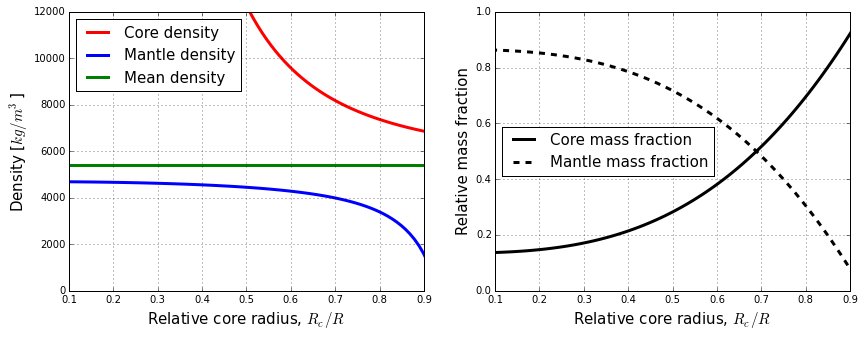

In [9]:
# Plot results
fig = plt.figure(figsize=[14,5])

ax1 = fig.add_subplot(121)

# Density vs Relative core radius
ax1.plot( Rc, rhoc, 'r-', lw=3, label = r'Core density' )    
ax1.plot( Rc, rhom, 'b-', lw=3, label = r'Mantle density' )  
ax1.plot( Rc, rho, 'g-', lw=3, label = r'Mean density' ) 
ax1.set_xlim(0.1,0.9)
ax1.grid()
ax1.set_ylim(0,12000)
ax1.set_xlabel('Relative core radius, $R_c/R$', fontsize = 15 )
ax1.set_ylabel('Density [$kg/m^3$]', fontsize = 15 )
ax1.legend(loc='best', fontsize=15)

# Relative mass fraction vs relative core radius
ax2 = fig.add_subplot(122)
ax2.plot( Rc, Mc, 'k-',  lw=3, label = 'Core mass fraction' )   
ax2.plot( Rc, 1. - Mc, 'k--',  lw=3, label = 'Mantle mass fraction' )   
ax2.set_xlim(0.1,0.9)
ax2.set_ylim(0,1)
ax2.set_xlabel('Relative core radius, $R_c/R$', fontsize = 15 )
ax2.set_ylabel('Relative mass fraction', fontsize = 15 )
ax2.grid()
ax2.legend(loc='best', fontsize=15)

## Mercury Interior Structure

In [5]:
planet = plc("Mercury", debug=0)
mercury = planet
rho0 = mercury.density
moif = mercury.moif

In [6]:
Rc, Mc, rhoc, rhom = ints.two_layer_model(rho0, moif)
rho = np.ones_like(Rc)*rho0

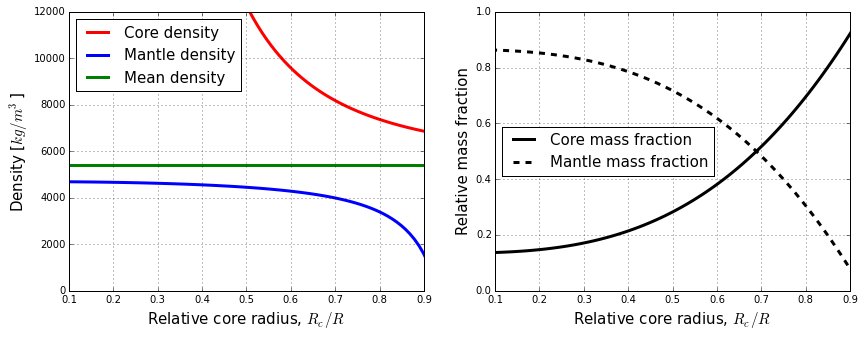

In [7]:
fig = plt.figure(figsize=[14,5])

ax1 = fig.add_subplot(121)

ax1.plot( Rc, rhoc, 'r-', lw=3, label = r'Core density' )    
ax1.plot( Rc, rhom, 'b-', lw=3, label = r'Mantle density' )  
ax1.plot( Rc, rho, 'g-', lw=3, label = r'Mean density' ) 
ax1.set_xlim(0.1,0.9)
ax1.grid()
ax1.set_ylim(0,12000)
ax1.set_xlabel('Relative core radius, $R_c/R$', fontsize = 15 )
ax1.set_ylabel('Density [$kg/m^3$]', fontsize = 15 )
ax1.legend(loc=2, fontsize=15)

ax2 = fig.add_subplot(122)
ax2.plot( Rc, Mc, 'k-',  lw=3, label = 'Core mass fraction' )   
ax2.plot( Rc, 1. - Mc, 'k--',  lw=3, label = 'Mantle mass fraction' )   
ax2.set_xlim(0.1,0.9)
ax2.set_ylim(0,1)
ax2.set_xlabel('Relative core radius, $R_c/R$', fontsize = 15 )
ax2.set_ylabel('Relative mass fraction', fontsize = 15 )
ax2.grid()
ax2.legend(loc='best', fontsize=15)